In [1]:
# This notebook was created by the article of E.Babushkin
# https://edwvb.blogspot.com/2019/10/avtomatizaciya-analiza-korporativnogo-oprosa-vovlechennosti-i-ne-tolko-s-pomoshchyu-r.html
# (c) Babushkin (data set)
# (c) Honcharov (Python code)

In [1]:
import pandas as pd

import scipy
import scipy.stats as ss

import numpy as np


In [2]:
# Read data from csv file to df and make df as Pandas.DataFrame
df = pd.read_csv('survey_results.csv', encoding='cp1251', header=0, na_values='')


In [3]:
# Make list from column's names
cols = df.columns.tolist()

# Make list tablesList of crosstabs for all columns (factors) to last column (target)
tablesList = []
tablesDict = {}
for col in cols[:-1]:
    table = pd.crosstab(df[col],df['Готов рекомендовать'])
    tablesList.append(table)
    tablesDict[col] = table


In [4]:
tablesDictExpectedFr = {}
for key, table in tablesDict.items():
    tablesDictExpectedFr[key] = ss.contingency.expected_freq(table)
print(tablesDictExpectedFr)


{'Профессиональные качества': array([[ 0.94797688,  0.38728324,  0.66473988],
       [68.7283237 , 28.07803468, 48.19364162],
       [31.75722543, 12.97398844, 22.26878613],
       [31.75722543, 12.97398844, 22.26878613],
       [30.80924855, 12.5867052 , 21.60404624]]), 'Советуется с Вами': array([[95.2716763 , 38.92196532, 66.80635838],
       [51.66473988, 21.10693642, 36.2283237 ],
       [17.06358382,  6.97109827, 11.96531792]]), 'Наличие четких целей, KPI': array([[52.61271676, 21.49421965, 36.89306358],
       [41.71098266, 17.04046243, 29.24855491],
       [69.67630058, 28.46531792, 48.8583815 ]]), 'Делегирует полномочия': array([[17.95362319,  7.37971014, 12.66666667],
       [66.6173913 , 27.3826087 , 47.        ],
       [78.42898551, 32.23768116, 55.33333333]]), 'Дает обратную связь': array([[88.35072464, 36.31594203, 62.33333333],
       [74.64927536, 30.68405797, 52.66666667]]), 'Критикует в присутствии других': array([[51.81449275, 21.16811594, 36.0173913 ],
       [79.8

In [5]:
# Function for check tables with Expected Frequencies for values less 5
def countLess5(mat):
    if (mat < 5).sum().sum() > 0:
        return (mat < 5).sum().sum()
    else:
        return 0


In [6]:
# Check if there are values less than 5
dictLess5 = {}
for k, v in tablesDictExpectedFr.items():
    dictLess5[k] = countLess5(v)

# Import termcolor for color printing in terminal
from termcolor import colored 

# print dictionary with values and make attention on values less 5
for k, v in sorted(dictLess5.items(), key = lambda kv: (kv[1], kv[0]), reverse=True):
    if v > 0:
        print(colored('''\nAttention!
There are items less 5 in:''', 'red'))
        print('\t', k, ': ', v)
    else:
        print('\t', k, ': ', v)



Attention!
There are items less 5 in:
	 Профессиональные качества :  3
	 Советуется с Вами :  0
	 Саморазвитие руководителя :  0
	 Проявляет заботу о Вашем развитии :  0
	 Повышает на Вас голос :  0
	 Наличие четких целей, KPI :  0
	 Критикует в присутствии других :  0
	 Знает о карьерных планах :  0
	 Делегирует полномочия :  0
	 Дает обратную связь :  0
	 Благодарит за достижения :  0


In [7]:
# Check does it number less 20%
tableDim = lambda x: x.shape[0] * x.shape[1] 

for k, v in dictLess5.items():
    check20 = v / tableDim(tablesDict[k])
    print('\t', k, ': ', check20)


	 Профессиональные качества :  0.2
	 Советуется с Вами :  0.0
	 Наличие четких целей, KPI :  0.0
	 Делегирует полномочия :  0.0
	 Дает обратную связь :  0.0
	 Критикует в присутствии других :  0.0
	 Благодарит за достижения :  0.0
	 Знает о карьерных планах :  0.0
	 Саморазвитие руководителя :  0.0
	 Проявляет заботу о Вашем развитии :  0.0
	 Повышает на Вас голос :  0.0


In [8]:
print(tablesDict['Профессиональные качества'])


Готов рекомендовать                                 Да  Не знаю  Нет
Профессиональные качества                                           
Не знаю                                              0        0    2
Он имеет высокую профессиональную подготовку        78       26   41
Он имеет низкую профессиональную подготовку         20       16   31
Он практически не обладает профессиональными зн...  22       11   34
Он, безусловно, является экспертом в моей профе...  44       14    7


In [9]:
# We replace zeros with NaN by numpy module np.nan
df.loc[df['Профессиональные качества'] == 'Не знаю', ['Профессиональные качества']] = np.nan


In [10]:
# We recalculate the cross tables
tablesList = []
tablesDict = {}
for col in cols[:-1]:
    table = pd.crosstab(df[col],df['Готов рекомендовать'])
    tablesList.append(table)
    tablesDict[col] = table
    

In [11]:
# Check table Профессиональные качества
print(tablesDict['Профессиональные качества'])


Готов рекомендовать                                 Да  Не знаю  Нет
Профессиональные качества                                           
Он имеет высокую профессиональную подготовку        78       26   41
Он имеет низкую профессиональную подготовку         20       16   31
Он практически не обладает профессиональными зн...  22       11   34
Он, безусловно, является экспертом в моей профе...  44       14    7


In [12]:
# Count the chi-square for crosstabs.  
chi2Dict = {}
for k, v in tablesDict.items():
    chi2, p, dof, expected = ss.chi2_contingency(v)
    chi2Dict[k] = p

# Display the sorted p-value (descending).  
print('p-values')
outputText = ': {:f}'

for k, v in sorted(chi2Dict.items(), key=lambda kv: (kv[1], kv[0]), reverse=True):
    if v >= 0.01:
        out = str(k) + outputText.format(v)
        print(colored(out, 'red'))
    else:
        print(k, outputText.format(v))


p-values
Повышает на Вас голос: 0.090679
Делегирует полномочия: 0.015633
Критикует в присутствии других : 0.000483
Наличие четких целей, KPI : 0.000225
Знает о карьерных планах : 0.000163
Советуется с Вами : 0.000025
Профессиональные качества : 0.000002
Дает обратную связь : 0.000000
Саморазвитие руководителя : 0.000000
Проявляет заботу о Вашем развитии : 0.000000
Благодарит за достижения : 0.000000


In [13]:
# Delete this two variables (two factors) from DataFrame.  
df.drop(columns='Повышает на Вас голос', inplace=True)
df.drop(columns='Делегирует полномочия', inplace=True)

# Remake list from column's names.  
cols = df.columns.tolist()


In [14]:
# We recalculate the cross tables
tablesList = []
tablesDict = {}
for col in cols[:-1]:
    table = pd.crosstab(df[col],df['Готов рекомендовать'])
    tablesList.append(table)
    tablesDict[col] = table

In [15]:
# We recalculate the tables of expected frequencies
tablesDictExpectedFr = {}
for key, table in tablesDict.items():
    tablesDictExpectedFr[key] = ss.contingency.expected_freq(table)
print(tablesDictExpectedFr)

{'Профессиональные качества': array([[69.12790698, 28.24127907, 47.63081395],
       [31.94186047, 13.0494186 , 22.00872093],
       [31.94186047, 13.0494186 , 22.00872093],
       [30.98837209, 12.65988372, 21.35174419]]), 'Советуется с Вами': array([[95.2716763 , 38.92196532, 66.80635838],
       [51.66473988, 21.10693642, 36.2283237 ],
       [17.06358382,  6.97109827, 11.96531792]]), 'Наличие четких целей, KPI': array([[52.61271676, 21.49421965, 36.89306358],
       [41.71098266, 17.04046243, 29.24855491],
       [69.67630058, 28.46531792, 48.8583815 ]]), 'Дает обратную связь': array([[88.35072464, 36.31594203, 62.33333333],
       [74.64927536, 30.68405797, 52.66666667]]), 'Критикует в присутствии других': array([[51.81449275, 21.16811594, 36.0173913 ],
       [79.86086957, 32.62608696, 55.51304348],
       [32.32463768, 13.2057971 , 22.46956522]]), 'Благодарит за достижения': array([[43.73333333, 17.6       , 30.66666667],
       [74.15652174, 29.84347826, 52.        ],
       [4

In [16]:
# Count the chi-square for crosstabs.  
chi2Dict = {}
for k, v in tablesDict.items():
    chi2, p, dof, expected = ss.chi2_contingency(v)
    chi2Dict[k] = p

# Display the sorted p-value (descending).  
print('p-values')
outputText = ': {:f}'

for k, v in sorted(chi2Dict.items(), key=lambda kv: (kv[1], kv[0]), reverse=True):
    if v >= 0.01:
        out = str(k) + outputText.format(v)
        print(colored(out, 'red'))
    else:
        print(k, outputText.format(v))


p-values
Критикует в присутствии других : 0.000483
Наличие четких целей, KPI : 0.000225
Знает о карьерных планах : 0.000163
Советуется с Вами : 0.000025
Профессиональные качества : 0.000002
Дает обратную связь : 0.000000
Саморазвитие руководителя : 0.000000
Проявляет заботу о Вашем развитии : 0.000000
Благодарит за достижения : 0.000000


## Cramer coefficient calculation function


In [25]:
def cramers_corrected_stat(confusion_matrix, correction: bool) -> float:
    """Calculate the Cramer's V corrected stat for two variables.

    Args:
        confusion_matrix: Crosstab between two variables.
        correction: Should the correction be applied?

    Returns:
        The Cramer's V corrected stat for the two variables.
    """
    chi2 = ss.chi2_contingency(confusion_matrix, correction=correction)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0.0, phi2 - ((k - 1.0) * (r - 1.0)) / (n - 1.0))
    rcorr = r - ((r - 1.0) ** 2.0) / (n - 1.0)
    kcorr = k - ((k - 1.0) ** 2.0) / (n - 1.0)
    return np.sqrt(phi2corr / min((kcorr - 1.0), (rcorr - 1.0)))

In [29]:
# Calculate V Cramers
cramersData = {}
for k, v in tablesDict.items():
    cramersData[k] = cramers_corrected_stat(v, True)

resultText = '{}: {:0.2f}'
for k, v in sorted(cramersData.items(), key=lambda kv: (kv[1], kv[0]), reverse=True):
    print(resultText.format(k, v))

Дает обратную связь: 0.30
Благодарит за достижения: 0.29
Проявляет заботу о Вашем развитии: 0.28
Саморазвитие руководителя: 0.24
Знает о карьерных планах: 0.21
Профессиональные качества: 0.21
Советуется с Вами: 0.18
Наличие четких целей, KPI: 0.16
Критикует в присутствии других: 0.15


In [30]:
# Create Series from Dictionary
plotData = pd.Series(cramersData, name=('Факторы', 'Сила связи')).sort_values()
plotData


Критикует в присутствии других       0.153027
Наличие четких целей, KPI            0.160563
Советуется с Вами                    0.180776
Профессиональные качества            0.210225
Знает о карьерных планах             0.211851
Саморазвитие руководителя            0.239321
Проявляет заботу о Вашем развитии    0.284094
Благодарит за достижения             0.289933
Дает обратную связь                  0.299250
Name: (Факторы, Сила связи), dtype: float64

## Build a chart.

Text(0.5, 1.0, 'Важность факторов')

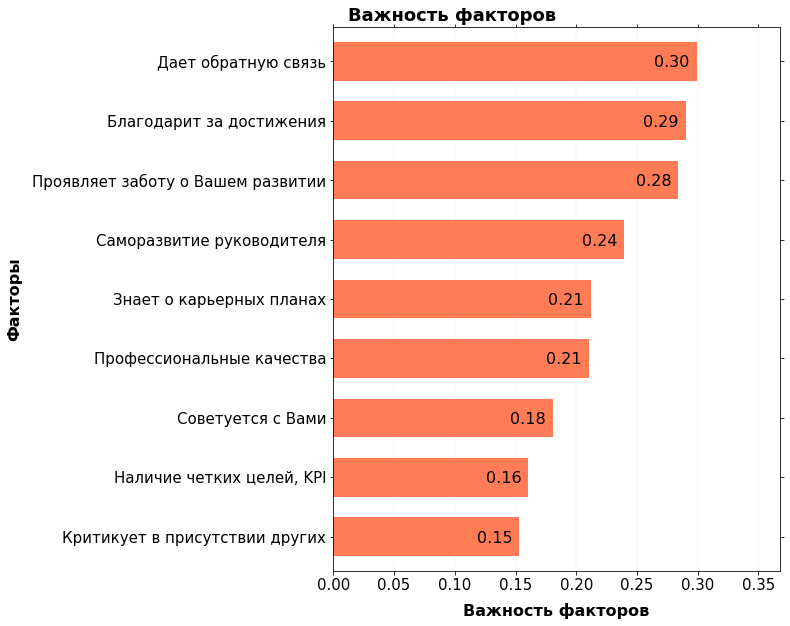

In [21]:
ax = plotData.plot(kind='barh',
        title="Важность факторов",
        fontsize=15,
        legend=False,
        figsize=(8, 10),
        color='#FF7C55',
        zorder=2,
        width=0.65)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Make annotations on chart
i = 0
for k, v in plotData.items():
    ax.annotate('{:.2f}'.format(v), xy=(v-0.035, i-0.1), fontsize=16)
    i +=1

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Важность факторов", labelpad=10, weight='bold', size=16)

# Set y-axis label
ax.set_ylabel("Факторы", labelpad=10, weight='bold', size=16)

# Set title label
ax.set_title(label='Важность факторов', fontsize=18, fontweight='bold', horizontalalignment='right')
